[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Classical_Frameworks/Text_Classif_TF_neuralnet.ipynb)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [ ]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/df_total.csv")

In [1]:
df.tail()

NameError: name 'df' is not defined

In [ ]:
df["Type"].dtype

dtype('O')

In [ ]:
# convert to category type
df["targets"] = df["Type"].astype('category').cat.codes
#.cat.codes
#Retourne les codes numériques associés à chaque catégorie.
#Chaque catégorie unique est mappée à un entier unique, par exemple :
#Si ["A", "B", "C"] sont les catégories, elles seront encodées respectivement comme [0, 1, 2].


In [ ]:
#split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [ ]:
tfidf= TfidfVectorizer()
Xtrain = tfidf.fit_transform(df_train["news"])
Xtest =  tfidf.transform(df_test["news"])

In [ ]:
Xtrain

<851x24883 sparse matrix of type '<class 'numpy.float64'>'
	with 202053 stored elements in Compressed Sparse Row format>

In [ ]:
Xtest

<366x24883 sparse matrix of type '<class 'numpy.float64'>'
	with 83751 stored elements in Compressed Sparse Row format>

In [ ]:
Ytrain = df_train["targets"]
Ytest = df_test["targets"]

In [ ]:
#number of classes
K = df["targets"].max() +1

In [ ]:
D = Xtrain.shape[1]
D # nb de mots de xtrain apres vectorization

24883

In [ ]:
# Build of the model

i = Input(shape=(D,))
x = Dense( 300, activation = 'relu')(i)
x = Dense(K)(x) #softmax

model = Model(i,x)

In [ ]:
model.summary() # 7 categories au final

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 24883)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │       7,465,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           2,107 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,467,307 (28.49 MB)

 Trainable params: 7,467,307 (28.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data must not be sparse matrix before passing to tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [ ]:
r = model.fit(Xtrain, Ytrain,
              validation_data=(Xtest,Ytest),
              epochs = 100, batch_size = 12)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.5542 - loss: 2.1791 - val_accuracy: 0.6503 - val_loss: 1.7141
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.8315 - loss: 1.0637 - val_accuracy: 0.5383 - val_loss: 1.8069
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8060 - loss: 1.1805 - val_accuracy: 0.4918 - val_loss: 1.8245
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.7880 - loss: 1.2054 - val_accuracy: 0.4945 - val_loss: 1.7893
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.8079 - loss: 1.1771 - val_accuracy: 0.4945 - val_loss: 1.7631
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.7674 - loss: 1.1282 - val_accuracy: 0.5410 - val_loss: 1.5643
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.7399 - loss: 1.0872 - val_accuracy: 0.3607 - val_loss: 1.8266
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6985 - loss: 1.2400 - val_accur

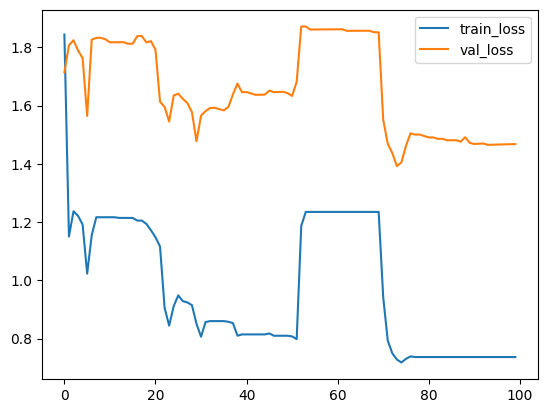

In [ ]:
plt.plot(r.history['loss'], label ='train_loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

In [ ]:
### **Analyse ligne par ligne** du model.summary

1. **`i = Input(shape=(D,))`**
   - Définit l'entrée du modèle.
   - `shape=(D,)` : Indique que chaque échantillon en entrée aura \( D \) caractéristiques ou dimensions. Par exemple, si \( D = 100 \), chaque vecteur d'entrée aura 100 éléments.
   - `i` représente le **nœud d'entrée** du réseau.

2. **`x = Dense(300, activation='relu')(i)`**
   - Ajoute une couche dense (fully connected) avec 300 neurones.
   - **Activation** : Fonction d'activation ReLU (\( \text{ReLU}(z) = \max(0, z) \)) est appliquée sur la sortie de cette couche pour introduire de la non-linéarité.
   - La couche prend comme entrée le tenseur défini par \( i \) et retourne un tenseur de dimension \( 300 \).

3. **`x = Dense(K)(x)`**
   - Ajoute une autre couche dense, cette fois avec \( K \) neurones.
   - Pas de fonction d'activation spécifiée, ce qui signifie qu'elle applique une activation linéaire (\( z \)) par défaut.
   - Cette couche est souvent utilisée pour produire les logits dans une tâche de classification multiclasses avec \( K \) classes.

4. **`model = Model(i, x)`**
   - Crée un modèle Keras en spécifiant les **entrées** (\( i \)) et les **sorties** (\( x \)).
   - Ce modèle peut être compilé et entraîné sur des données.

5. **`model.summary()`**
   - Affiche un résumé du modèle, incluant :
     - Le nom des couches.
     - Le type des couches et leurs dimensions de sortie.
     - Le nombre de paramètres entraînables.

---

### **Interprétation de la sortie (`model.summary()`)**

#### Exemple de sortie si \( D = 100 \), \( K = 10 \) :
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
input_1 (InputLayer)         [(None, 100)]            0
dense (Dense)                (None, 300)              30300
dense_1 (Dense)              (None, 10)               3010
=================================================================
Total params: 33,310
Trainable params: 33,310
Non-trainable params: 0
_________________________________________________________________
```

#### **Lignes principales du résumé :**
1. **`input_1 (InputLayer)`**
   - **Output Shape :** `(None, 100)` : La dimension de l'entrée est \( 100 \), et `None` indique que le batch size peut être quelconque.
   - **Param # :** 0 : Cette couche ne contient pas de paramètres à entraîner.

2. **`dense (Dense)`**
   - **Output Shape :** `(None, 300)` : Cette couche produit un tenseur de taille 300 pour chaque échantillon.
   - **Param # :** \( (D + 1) \times 300 = (100 + 1) \times 300 = 30,300 \) :
     - \( 100 \) poids par neurone (\( D \) caractéristiques).
     - \( +1 \) pour le biais par neurone.
     - Total : \( 30,300 \).

3. **`dense_1 (Dense)`**
   - **Output Shape :** `(None, 10)` : Cette couche produit une sortie de dimension \( K = 10 \) pour chaque échantillon.
   - **Param # :** \( (300 + 1) \times 10 = 3010 \) :
     - \( 300 \) poids par neurone.
     - \( +1 \) pour le biais par neurone.
     - Total : \( 3,010 \).

#### **Résumé global :**
- **Total params : 33,310** : Nombre total de paramètres entraînables dans le modèle.
- **Trainable params : 33,310** : Paramètres que le modèle ajustera durant l'entraînement.
- **Non-trainable params : 0** : Pas de paramètres figés ou non entraînables.

---

### **Comment interpréter cela en pratique ?**

1. **Taille des couches :**
   - Chaque couche transforme les données d'une dimension à une autre.
   - Ici, la première couche passe d'une entrée de 100 dimensions à 300, et la deuxième couche réduit à 10 (sortie pour \( K = 10 \) classes).

2. **Paramètres à entraîner :**
   - \( 33,310 \) paramètres montrent la capacité du modèle.
   - Plus il y a de paramètres, plus le modèle peut apprendre des relations complexes, mais cela peut aussi conduire à un surapprentissage (overfitting).

3. **Préparation pour une tâche de classification :**
   - Ce modèle est souvent utilisé pour une tâche de classification où \( K = 10 \) représente le nombre de classes.

Pour finaliser, il est courant d'ajouter une **fonction d'activation softmax** après la dernière couche dense lors de la compilation du modèle, pour obtenir des probabilités :
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```